In [140]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [117]:
from PIL import Image
tiff_image = '/home/adiraz/adiraz/output/crops/2010/000002_MISR_AM1_GRP_TERRAIN_GM_P041_O058358_AA_F03_0024.tiff'
multi_angle = Image.open(tiff_image)

In [118]:
multi_angle.n_frames

36

In [119]:
import numpy as np
images_array = np.zeros([4*9,16,16])
for i in range(multi_angle.n_frames):
    multi_angle.seek(i)
    im = multi_angle
    images_array[i,:,:] = np.array(im)
    
    

<Figure size 360x360 with 0 Axes>

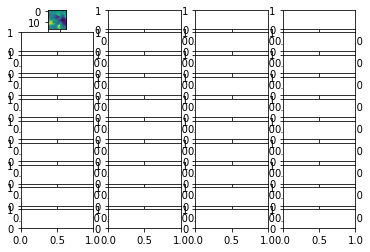

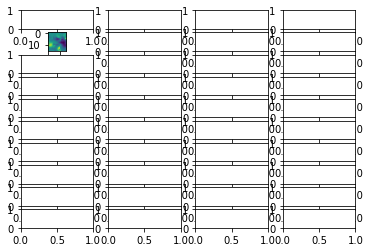

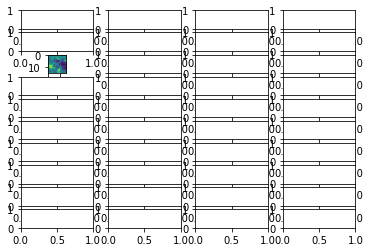

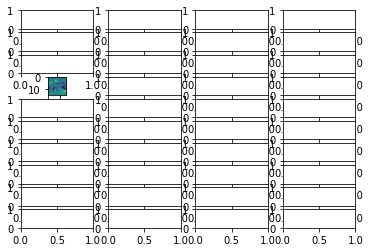

In [139]:
import matplotlib.pyplot as plt
columns = 4
plt.figure(figsize=(5,5))
for i, image in enumerate(images_array[0:4]):
    fig, axes = plt.subplots(int(len(images_array) / columns + 1), columns)
    axes[i,0].imshow(image)


In [132]:
from tests import test_get_image_around_pm

In [122]:
im = test_get_image_around_pm()

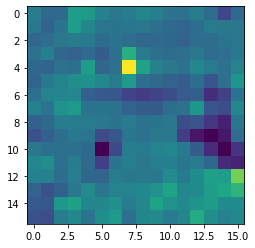

In [123]:
import numpy as np
i = np.asarray(im[3])
import matplotlib.pyplot as plt
plt.imshow(i)

In [82]:
i

array([[38.880314, 37.276745, 37.350758, 41.59404 , 41.248657, 39.176353,
        38.386906, 38.954323, 39.66976 , 38.978992, 38.041523, 37.91817 ,
        38.85564 , 37.54812 , 34.68637 , 37.252075],
       [38.46092 , 36.68466 , 38.090866, 41.61871 , 39.66976 , 38.263557,
        38.214214, 38.263557, 38.362236, 37.794823, 37.252075, 36.931362,
        37.69614 , 38.58427 , 38.46092 , 38.362236],
       [37.030045, 37.62213 , 38.386906, 38.83097 , 38.60894 , 37.54812 ,
        38.164875, 37.6468  , 37.054714, 37.350758, 37.202736, 36.68466 ,
        37.62213 , 37.69614 , 38.140205, 38.386906],
       [37.8935  , 39.077675, 37.005375, 36.68466 , 37.400097, 36.314606,
        37.72081 , 43.197605, 38.8063  , 37.844162, 37.52345 , 37.77015 ,
        38.362236, 37.49878 , 37.74548 , 38.510258],
       [37.128723, 36.95603 , 38.016853, 37.844162, 41.64338 , 37.054714,
        38.016853, 50.52467 , 42.038105, 39.176353, 38.386906, 37.967514,
        39.7191  , 38.63361 , 38.016853, 39.3490

In [76]:
matches_pm_images_file = '/home/adiraz/adiraz/output/pm_misr_matches/pm_misr_matches_2010.json'
import json
from misr_data_mtk import MISR_Data
with open(matches_pm_images_file) as f:
    pm_images_matches = json.load(f)
pm_image_match = pm_images_matches[0]
pm_data = pm_image_match['pm_data']
pm_label = pm_data['arithmetic_mean']
pm_loc = {'latitude': pm_data['latitude'], 'longitude': pm_data['longitude']}
path_num='39'
image_data = pm_image_match['images']['39']
block = pm_data['pm_pixels_location'][path_num][0]
line = pm_data['pm_pixels_location'][path_num][1]
sample =  pm_data['pm_pixels_location'][path_num][2]
pixel_xy = (sample,line)
multi_angle_images_list=[]
for image_file in image_data:
    misr = MISR_Data(image_file)
    multi_channnel_image = misr.get_block(block)
    multi_angle_images_list.append(multi_channnel_image)
multi_angle_image = np.ma.concatenate(multi_angle_images_list,axis=0)
box_size= 16
box_half_size = box_size//2
if pixel_xy[0] < box_half_size or pixel_xy[1]  < box_half_size:
    return []
left, upper, right, lower = pixel_xy[0] - box_half_size, pixel_xy[1]-box_half_size, pixel_xy[0] + box_half_size,pixel_xy[1]+box_half_size


SyntaxError: 'return' outside function (<ipython-input-76-77e62afc8bd3>, line 25)

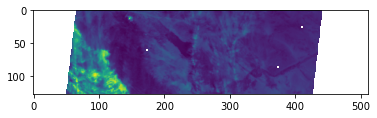

In [61]:
import matplotlib.pyplot as plt
im = multi_angle_image[0]
plt.imshow(im)

In [32]:
pixel_xy


(29.54534912109375, 2.205078125)

(<Figure size 576x576 with 6 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>], dtype=object))

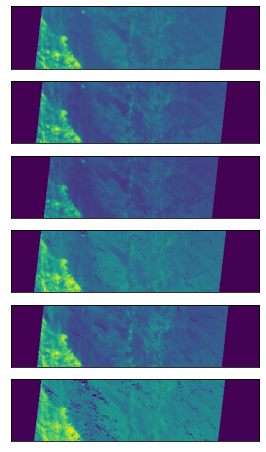

In [166]:
from view_images import view_images_as_thumbnails
view_images_as_thumbnails(multi_angle_image[np.array([0,4,8,12,16,20])],nrows=6)




In [158]:
np.argmax(multi_angle_image[0] -multi_angle_image[4])

58430